# 오버피팅 처리

# 모듈 임포팅

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential

# 데이터 준비


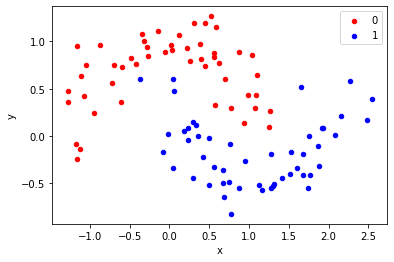

In [3]:
from sklearn.datasets import make_moons


# 데이터 생성
x, y = make_moons(n_samples=100, noise=0.2, random_state=32)


# 데이터 그림 그리기
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


# 데이터 나누기
split_index = int(len(x)*0.3)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

# 아무 처리 안했을 때

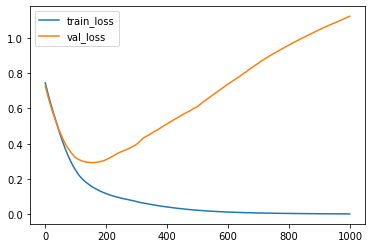

In [4]:
model = Sequential()
model.add(Input(2))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

base_history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)

plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


 # DropOut

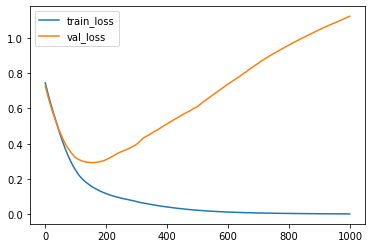

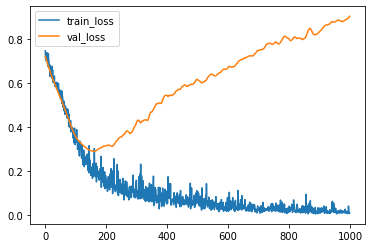

In [5]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Input(2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2)) # ADDED
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2)) # ADDED
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)


plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# BatchNormalization

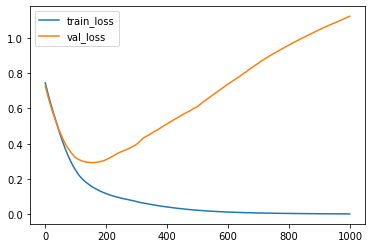

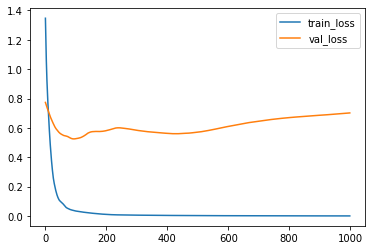

In [6]:
from tensorflow.keras.layers import BatchNormalization


model = Sequential()
model.add(Input(2))
model.add(Dense(20, activation='relu'))
model.add(BatchNormalization()) # ADDED
model.add(Dense(20, activation='relu'))
model.add(BatchNormalization()) # ADDED
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)


plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Regularization

Dense() 생성시에 kernel_regularization, bias_regularization으로 설정한다.

- l1()
- l1_l2()
- l2()

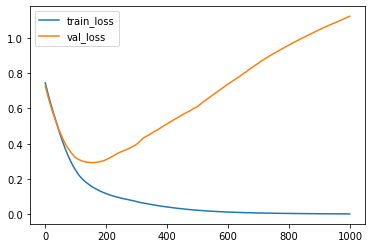

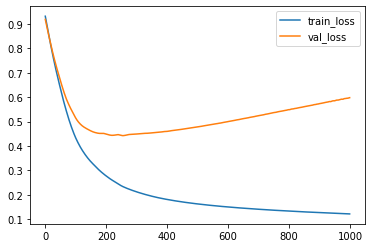

In [7]:
from tensorflow.keras.regularizers import l1, l2, L1L2

model = Sequential()
model.add(Input(2))
# model.add(Dense(20, activation='relu'))
# model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu', kernel_regularizer=l2()))
model.add(Dense(20, activation='relu', kernel_regularizer=l2()))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)


plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# noise 추가

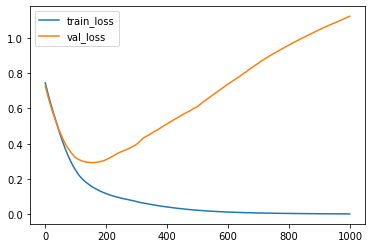

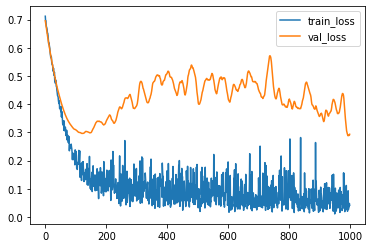

In [9]:
from tensorflow.keras.layers import GaussianNoise

model = Sequential()
model.add(Input(2))
model.add(GaussianNoise(0.1))   # ADDED
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)


plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# 전부 다

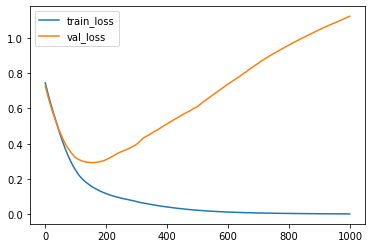

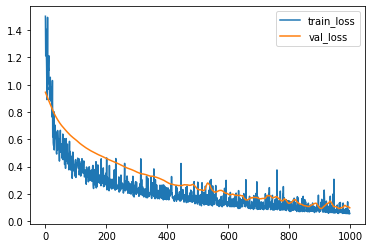

In [10]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.regularizers import l1, l2, L1L2

model = Sequential()
model.add(Input(2))
model.add(GaussianNoise(0.1))   # ADDED
model.add(Dense(20, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu', kernel_regularizer=l2()))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)


plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# 데이터를 10배로

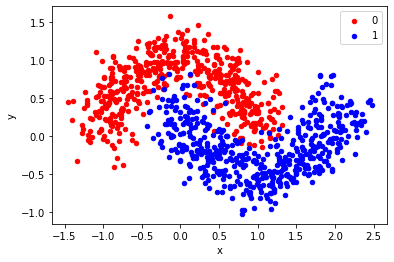

In [ ]:
from sklearn.datasets import make_moons


# 데이터 생성
# x, y = make_moons(n_samples=100, noise=0.2, random_state=32)
x, y = make_moons(n_samples=100*10, noise=0.2, random_state=32)


# 데이터 그림 그리기
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


# 데이터 나누기
split_index = int(len(x)*0.3)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

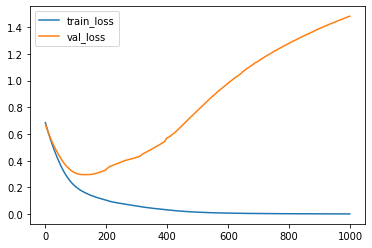

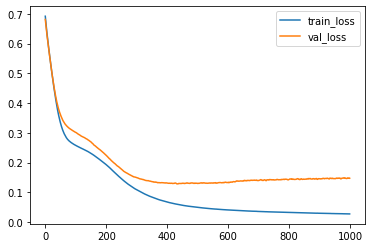

In [ ]:
model = Sequential()
model.add(Input(2))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')

history = model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=0, validation_split=0.2)


plt.plot(base_history.history['loss'], label='train_loss')
plt.plot(base_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
